# 5 数据挖掘概论

 KDD (Knowledge Discovery in Database): 从数据中发掘隐藏的有用的模式.

 数据预处理（数据清理、数据集成）→数据选择→数据变换→数据挖掘→模式评估→知识表示



## 数据预处理

* 数据聚合
* 数据集成
* 数据离散化
* 特征筛选
* 特征提取

### 数据采样

采样一部分数据研究. 在大规模社交网络中, 可以只爬取距离种子用户在 $n$ 跳范围内的节点用户与边. (由于六度分割, $n$ 可以很小, 如 $n\approx 3$.)


## 频繁模式挖掘

频繁模式挖掘 (frequent pattern mining) 亦称关联规则挖掘. 定义两个事件 $A,B$ 的支持度 (support) 与置信度 (confidence) 为
$$\begin{aligned}{\rm support}(A\Rightarrow B) &= \mathbb P(A\cap B) = {\rm support}(B\Rightarrow A)\\
{\rm confidence}(A\Rightarrow B) &= \mathbb P(B|A)\end{aligned}$$

假设有 $n$ 个事件 $A_1,\dotsc,A_n$ (称为"项"), 任意若干个的交集构成全集 $\Omega = \left\{X:\ X = \cap_{j=1}^k A_{a_j}\right\}$.

每个事件 $X\in\Omega$ 都有对应的出现概率 $\mathbb P(X)$. 任取一个阈值 ${\rm min\_sup}$, 如果 $\mathbb P(X)\geqslant {\rm min\_sup}$ 则称 $X$ 是频繁项集.

<br>

* 若 $B\subset A$, 则 $\mathbb P(B)\leqslant \mathbb P(A)$.
* 若 $B\subset A$ 且 $B$ 是频繁的, 则显然 $A$ 是频繁的.
* 若对于集合 $A$, 不存在 $B$ 使得 $B\subset A$ 且 ${\rm support}(A) = {\rm support}(B)$, 则称 $A$ 是闭项集.
* 若对于频繁的 $A$, 不存在 $B$ 使得 $B\subset A$ 且 $B$ 是频繁的, 则称 $A$ 是极小频繁的.

### Apriori算法

给定阈值 ${\rm min\_sup}$, Apriori算法用于求解所有频繁集. 算法: 先找只有一个事件构成的频繁集, 然后在此基础上看哪些可以构成两项的频繁集, ......

## 分类算法

### 决策树与随机森林


### 朴素贝叶斯

### K-近邻算法

(K-Nearest Neighbors, KNN) 每个点选取最近的 $K$ 个邻居, 用邻居中最多的一类类别预测该节点的类别.

### 基于社交辅助的分类

社交网路中, 每个节点分类的概率受到其邻居的影响, 即

$$\mathbb P(i)=  \frac{\sum_{j\in N(i)} \mathbb P(i)}{|N(i)|}$$

进行迭代计算直至收敛.



## 聚类算法

假设没有已知的类别. 将点进行无监督地归类 (簇), 即聚类 (clustering).

### 距离度量

欧氏距离、余弦相似度.


In [38]:
import numpy as np
from matplotlib import pyplot as plt
# Download GLoVE embedding at https://www.kaggle.com/datasets/anmolkumar/glove-embeddings
data_dir = 'D:\\Python Projects\\Neural Network\\RNN\\Glove Embedding\\glove.6B.50d.txt'
data = {}
with open(data_dir, 'r', errors='ignore') as f:
    for i in range(9000):
        data_line = f.readline().split()
        data[data_line[0]] = np.array([float(i) for i in data_line[1:]])

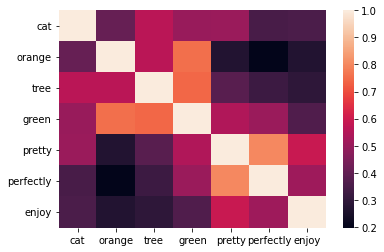

In [243]:
words = ['cat', 'orange', 'tree', 'green', 'pretty', 'perfectly', 'enjoy']

X = np.vstack([data[word].reshape((1,-1)) for word in words])
X /= np.linalg.norm(X, axis = 1, keepdims = True)

# https://www.tutorialspoint.com/plotly/plotly_heatmap.htm https://plotly.com/python/heatmaps/
# import plotly.graph_objects as go
# go.Figure(data = [go.Heatmap(z = X @ X.T, x = words, y = words, colorscale = 'Inferno')])

import seaborn as sns
sns.heatmap(data = X @ X.T, xticklabels = words, yticklabels = words)
plt.show()



### K-均值

(K-Means) 对于度量空间的若干个点, 先随机选取 $k$ 个点作为**中心点**. 然后再将所有点归类为最近的中心点. 再将每一类的中心作为新的中心点, 如此迭代.

该方法效果与初始随机的中心点有关.


In [237]:
from tqdm import tqdm
def KMeans(X, k, iter = 10):
    X /= np.linalg.norm(X, axis = 1, keepdims = True)
    center_indices = np.arange(X.shape[0])
    np.random.shuffle(center_indices)
    centers = X[center_indices[:k]] # random initialize centers
    for i in tqdm(range(iter)):
        classes = np.argmax(X @ centers.T, axis = 1)
        for c in range(k):
            centers[c] = ((classes == c).reshape((-1, 1)) * X).mean(axis = 0)
        centers /= np.linalg.norm(centers, axis = 1, keepdims = True)
    return classes

np.random.seed(0)
words = list(data.keys())
X = np.vstack([data[word].reshape((1,-1)) for word in words])
classes = KMeans(X, 9, iter = 30)

words2 = 'cat dog tree move run play sun pretty beautiful perfectly month year age jennifer friend manager crazy criminals orange southwestern legislators worker christians survive blue red yellow massacre bird individual business hospital treatment hands can shadow themes ambitious terrible somewhere sprint tears holidays legally pure weakness illness techniques reluctant overcome conspiracy implement useful mediterranean'.split()
words_in_classes = [[word for word in words2 if classes[words.index(word)] == i] for i in range(np.max(classes))]
print('\n'.join(['%s'%c for c in  words_in_classes]))

100%|██████████| 30/30 [00:01<00:00, 20.75it/s]

['month', 'year']
['jennifer', 'friend', 'manager']
['move', 'pretty', 'perfectly', 'crazy', 'survive', 'hands', 'can', 'shadow', 'terrible', 'somewhere', 'tears', 'weakness', 'illness', 'reluctant', 'overcome']
['age', 'southwestern', 'hospital']
['criminals', 'legislators', 'christians', 'massacre', 'conspiracy']
['tree', 'sun', 'orange', 'blue', 'red', 'yellow', 'bird', 'mediterranean']
['cat', 'dog', 'beautiful', 'themes', 'holidays', 'pure']
['run', 'play', 'sprint']



### 层次聚类

凝聚法是最常用的层次聚类法: 先将所有点各自作为一类. 然后将最近的两类合并. 重复上一步直至认为可以终止 (类似 Kruskal) .

### 聚类评估

假设最终分为 $k$ 簇, 第 $i$ 簇有 $x_{i1},\dotsc,x_{i,m_i}$, 第 $i$ 簇的中心为 $c_i$.  总共数目为 $\sum_{i=1}^{k}m_i = n$. 
评估聚类效果的指标有:

* 内聚性: $\sum_{i=1}^k \sum_{j=1}^{m_i}\Vert x_{ij} - c_i\Vert^2$
* 离散性: $\sum_{i=1}^k \Vert c_i - \frac{1}{n}\sum_{i,j}x_{ij}\Vert^2$
* Silhouette 指数: 令
$$\begin{aligned}a(i,j) &= \frac{1}{n-1}\sum_{(i',j')\neq(i,j)}\Vert x_{ij}-x_{i'j'}\Vert^2
\\ b(i,j) &= \min_{i'\neq i}\frac{1}{m_i'}\sum_{j'=1}^{m_i'}\Vert x_{ij} - x_{i'j'}\Vert^2 
\\ {\rm Silhouette} &= \frac{1}{n}\sum_{i,j}\frac{b(i,j) - a(i,j)}{\max (b(j),a(j))}\end{aligned}$$